Introduction

Early detection of cardiovascular disease (CVD) in patients would favor not only early treatment of symptoms but also could mean the difference between life and death for thousands of people. Hence, machine learning models may be very helpful in this matter.

In this data analytic project, machine learning algorithms are used in order to predict the occurrence of cardiovascular disease conditions and to identify the most important risk factors. For this purpose, we evaluate de performance of different classification algorithms (logistic regression, decision tree, random forest and k-nearest neighbor) and optimize the final model in order to obtain the model with the greatest predictive potential.

For the analysis we considered 10 variables height, weight, age, blood pressure (systolic and diastolic), cholesterol and glucose blood levels, as well as daily habits associated with smoking, physical activity and alcohol consumption.

1. Import data (.csv)

In [1]:
setwd("E:/Data Analytics/Para Portfolio/Heart_attack_database")
datos <-read.csv("heart_data.csv", header=T, sep = ",", dec=".")

In [5]:
#Load libraries
library(dplyr) 
library(ggplot2)
library(caret)
library(ggpubr)
library(randomForest) 
library(tibble) 
library(recipes) 
library(rpart.plot)
library(ROSE)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'recipes'


The following object is masked from 'package:stats':

    step


Loading required package: rpart

Loaded ROSE 0.0-4




2. Data cleaning & Exploratory Data Analysis

After loading the data we have to look for missing values, outliers, duplicate data and check if the variables have been stored with the type of data that corresponds to its nature (numeric, character or factor)

In [2]:
#2.a. Structure of data
dim(datos) 
head(datos) 
str(datos) 
summary(datos)
#Observations:
#The dataset contains 70000 instances and 14 variables.
#All variables are stored as numeric.
#The variable "age" is measured in days.

[1] 70000    14

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,2,18857,1,165,64,130,70,3,1,0,0,0,1
4,3,3,17623,2,169,82,150,100,1,1,0,0,1,1
5,4,4,17474,1,156,56,100,60,1,1,0,0,0,0
6,5,8,21914,1,151,67,120,80,2,2,0,0,0,0


'data.frame':	70000 obs. of  14 variables:
 $ index      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ cardio     : int  0 1 1 1 0 0 0 1 0 0 ...


     index             id             age            gender         height     
 Min.   :    0   Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:17500   1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :35000   Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :35000   Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:52499   3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :69999   Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.0

In [3]:
#2.b. Missing data and duplicated rows
any(!complete.cases(datos)) 
anyDuplicated(datos)

[1] FALSE

[1] 0

There are no missing data nor duplicated rows in the dataset.

In [6]:
#2.c. Response variable distribution
#Response variable: cardio
#Factor conversion 
datos$cardio<- as.factor(datos$cardio)

#Check class balance 
table(datos$cardio) 
prop.table(table(datos$cardio))%>% round(digits=2)


    0     1 
35021 34979 


  0   1 
0.5 0.5 

Classes are balanced, 50% of the pacients have CVD and 50% don't have the disease.

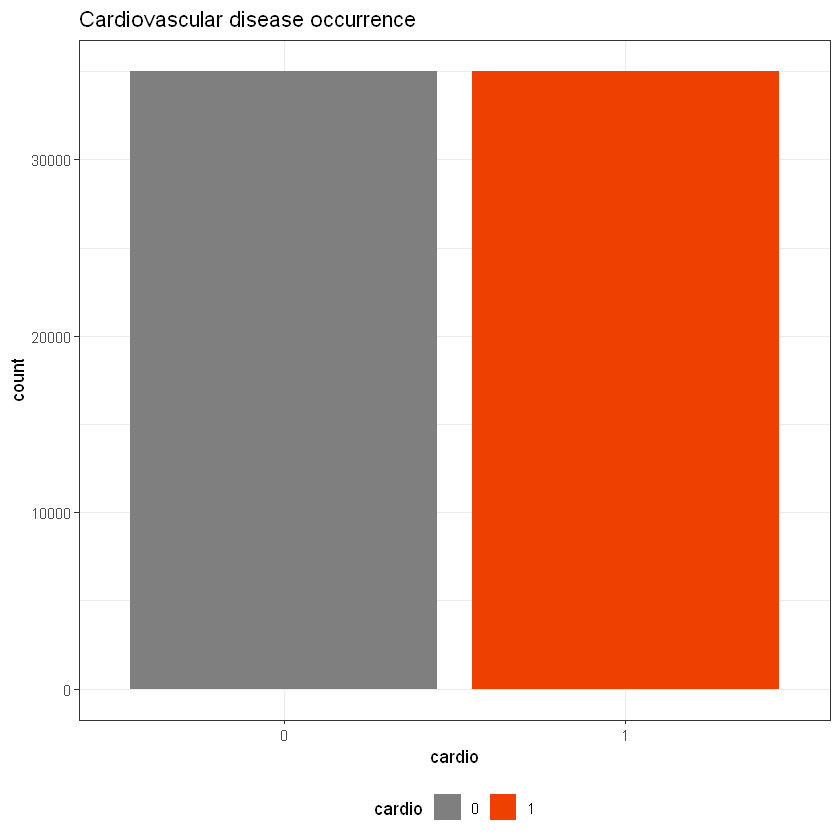

In [7]:
#Plot distribution
ggplot(data = datos, aes(x = cardio, y = after_stat(count), 
                         fill = cardio)) + 
  geom_bar() + 
  scale_fill_manual(values = c("gray50", "orangered2")) + 
  labs(title = "Cardiovascular disease occurrence") + 
  theme_bw() + 
  theme(legend.position = "bottom")

For a predictive model to be useful, it must have a success rate greater than what is expected by chance or at a certain basal level. In classification problems, the basal level is the one obtained if all observations are assigned to the mode (class majority). In this dataset, since 50% of people do not have CVD, if the model always predicts the mode (Cardio = 0), the percentage of hits will be about 50%. This is the minimum percentage that we have to try to exceed with the predictive models (in the training set).

In [8]:
#2.d.Quantitative variables
#Remove from the dataset the variables "Index" and "Id" since they won't be used for building the models
datos<- datos[,c(-1,-2)] 
#Transform "age" variable from days to years 
datos$age <- (datos$age/360)
datos$age <- as.integer(datos$age)

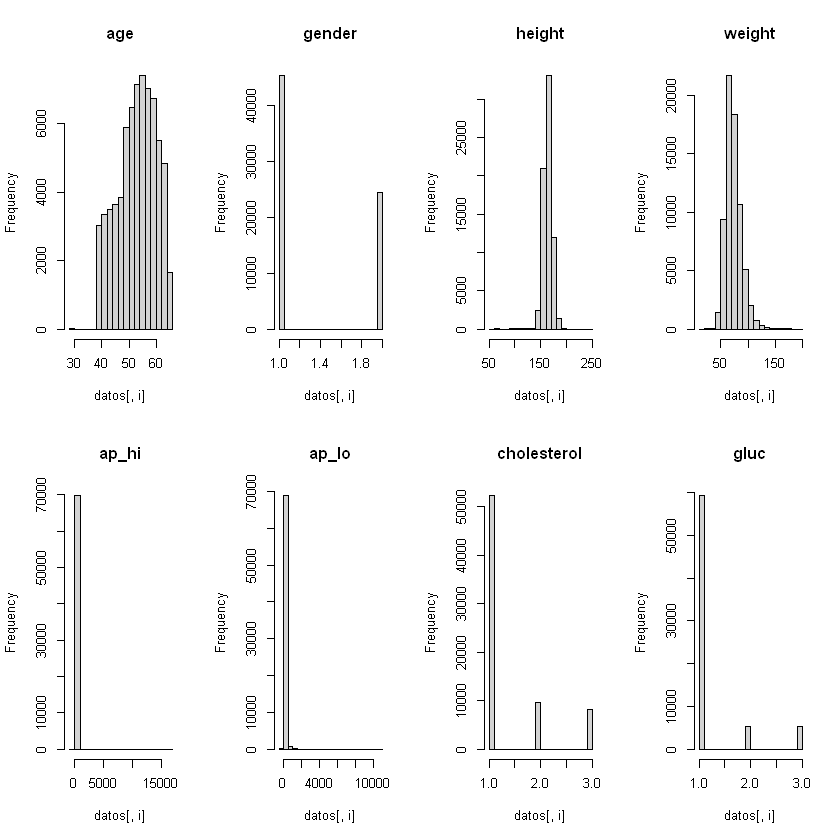

In [9]:
#Data visualization: Univariate plots
 par(mfrow=c(2,4)) 
 #Histograms 
 for (i in 1:8) {
   hist(datos [,i], main=names(datos)[i]) 
 } 

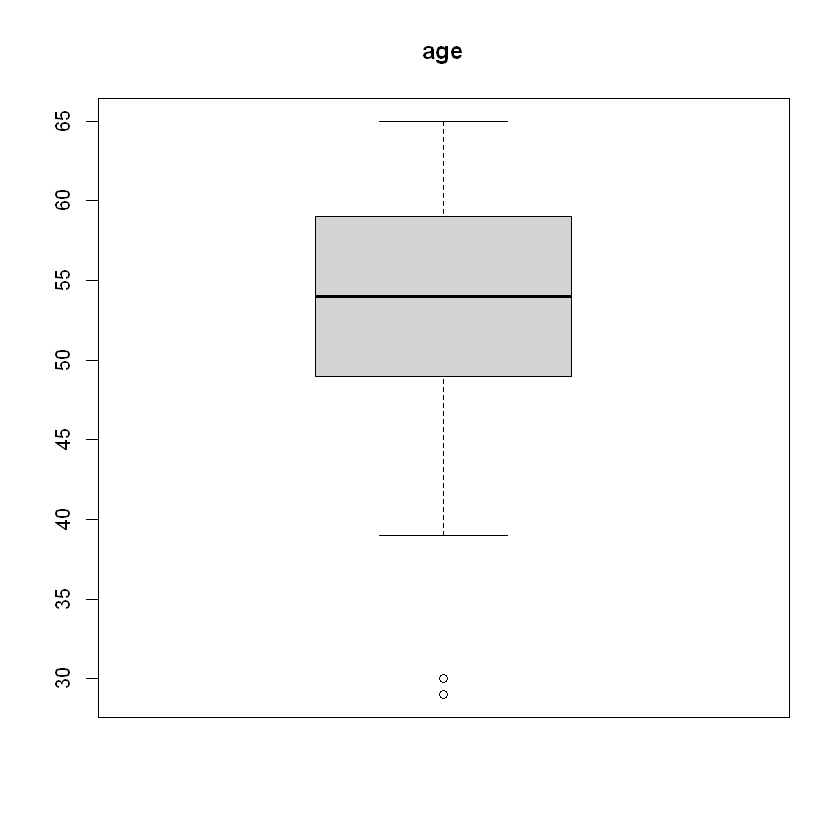

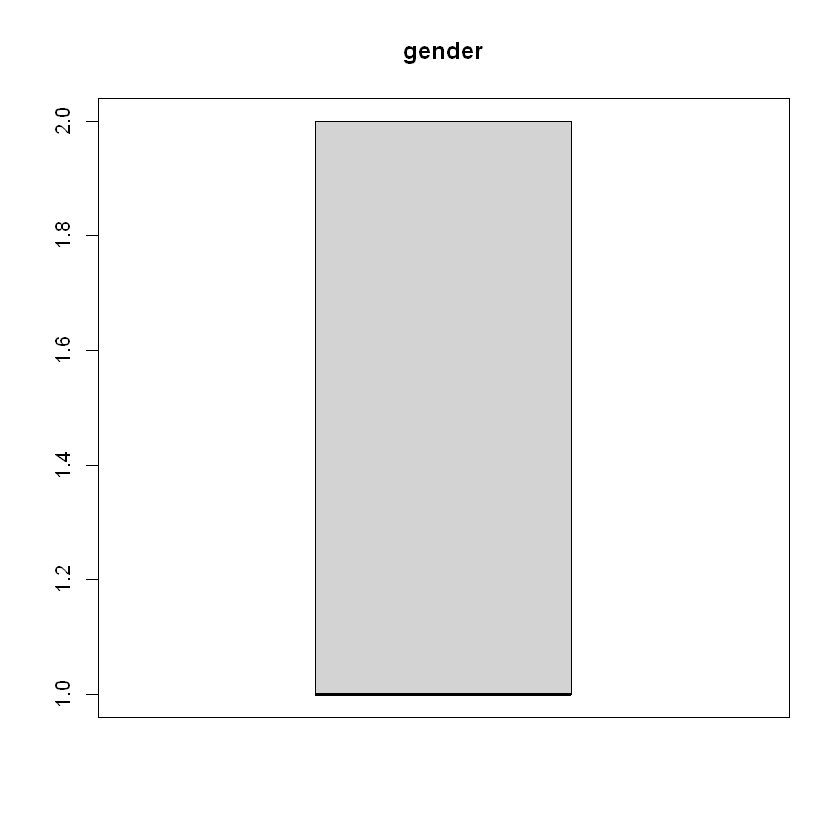

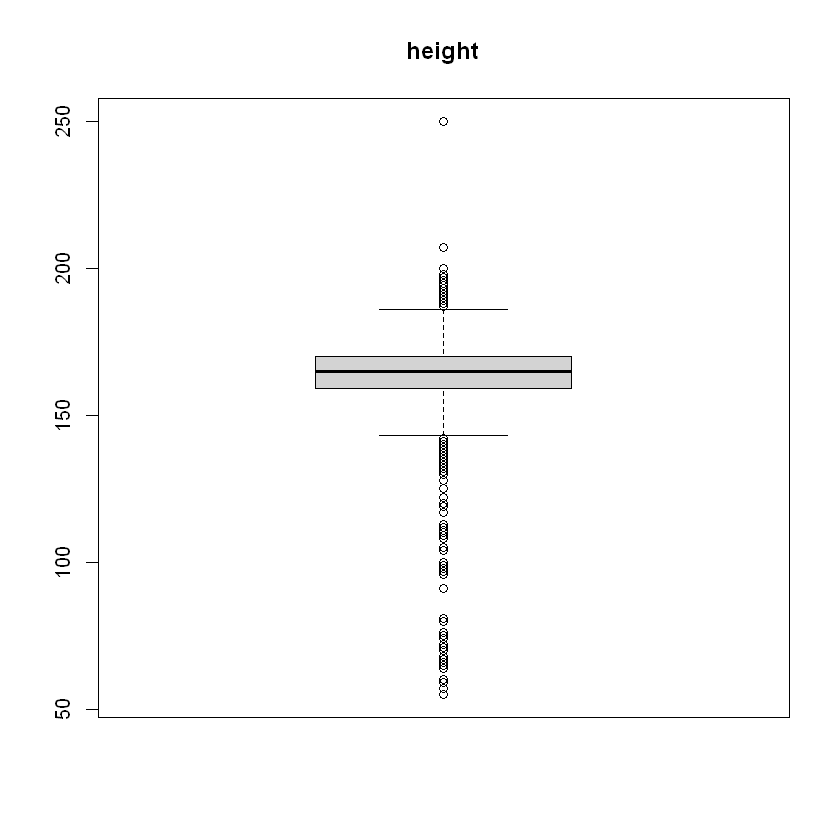

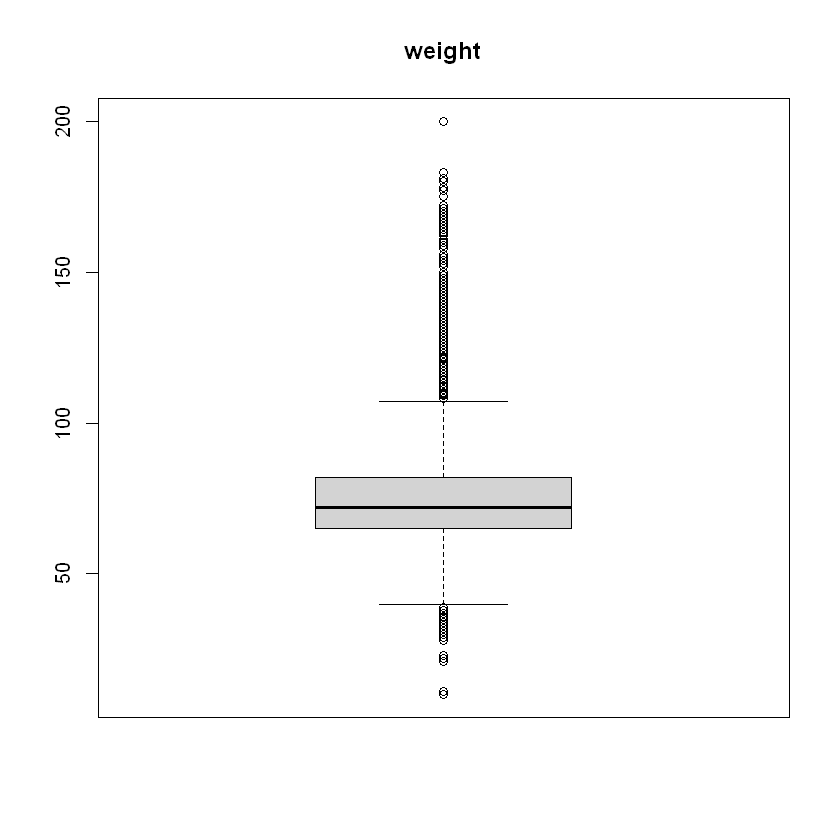

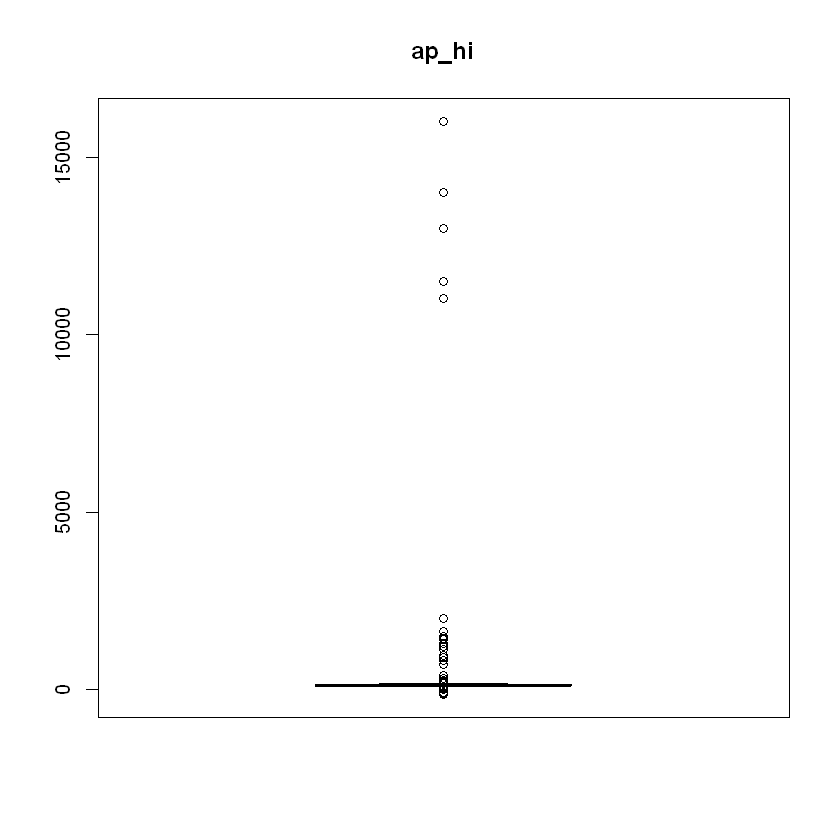

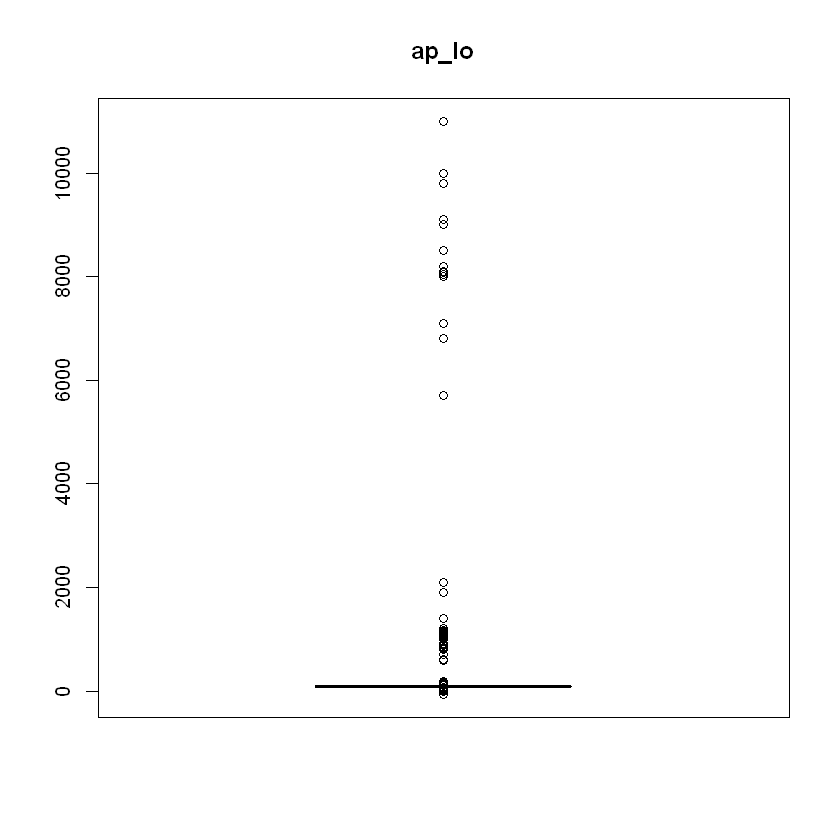

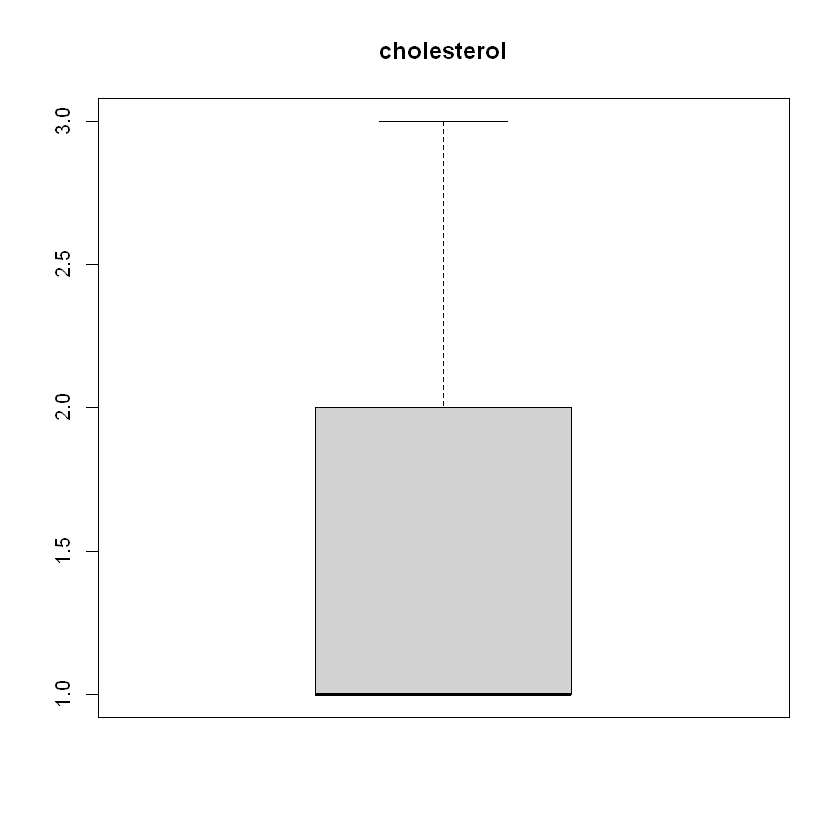

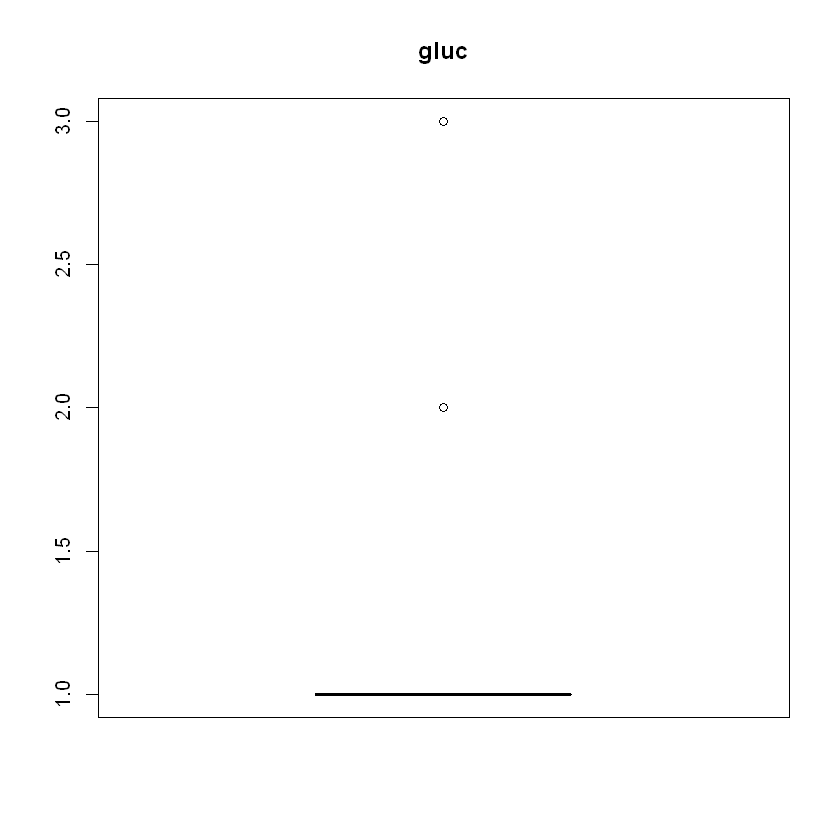

In [10]:
 #Boxplots
 for (i in 1:8) { 
   boxplot(datos [,i], main=names(datos)[i]) 
   }

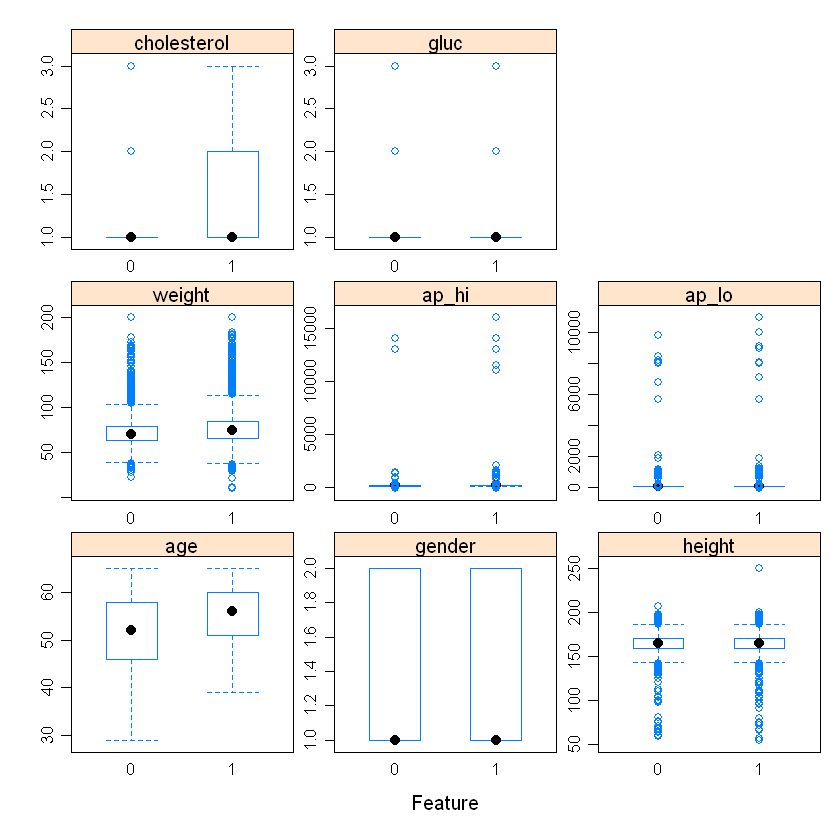

In [11]:
#Density matrix 
 x <- datos[, 1:8] 
 y <- datos[,12] #cardio 
scales <- list(x=list(relation="free"), y= list(relation="free"))
featurePlot(x=x, y=y, plot="box", scales=scales)


In [12]:
#check mean values of predictors per class
datos %>% 
  group_by(cardio) %>% 
  summarise(mean_age= mean(age),
            mean_height=mean(height), 
            mean_weight= mean(weight),
            mean_aplo=mean(ap_lo),
            mean_aphi=mean(ap_hi), 
            mean_chol= mean(cholesterol), 
            mean_glucose=mean(gluc))

cardio,mean_age,mean_height,mean_weight,mean_aplo,mean_aphi,mean_chol,mean_glucose
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,51.95003,164.4480,71.59215,84.25176,120.4326,1.216527,1.175380
1,55.21950,164.2703,76.82237,109.02393,137.2120,1.517396,1.277595


Observations:

-The variables "ap_lo" and "ap_hi" show an exponential distribution and they take negative values and zeros. Since the blood pressure measurement cannot give zeros or negatives, we proceed to remove the corrupted data.

-The variables "height", "weight", "ap_lo" and "ap_hi" have outliers

-The variables "cholesterol" and "gluc" only take on three values (1, 2 or 3), one alternative is to categorize them.

In [13]:
#Remove values of ap_lo and ap_hi that are <=0 
# select the number of rows with values <=0 using the which function
#datos [ which (datos$ ap_hi <=0),] 
#datos [which (datos$ap_lo <= 0), ]

#remove the rows from the dataset 
datos <- datos [c(-4608, -16022, -20537, -23989, -25241, -35041,
                  -46628, -2015, -13490, -16460, -17382, -22924,
                  -23868, -25455, -27687, -31784, -38371, -40331,
                  -41506, -42398, -43923, -45836, -48050, -52581,
                  -56951, -60107, -63788, -65304, -68664),]

In [14]:
##Outliers 
#filter outliers 
outlier_he<- boxplot(datos$height,data = datos, plot=FALSE)$out 
outlier_we<- boxplot(datos$weight,data = datos, plot=FALSE)$out 
outlier_aplo<- boxplot(datos$ap_lo,data = datos, plot=FALSE)$out 
outlier_aphi<- boxplot(datos$ap_hi,data = datos, plot=FALSE)$out 

#Remove outliers 
datos <- datos[!((datos$height %in% outlier_he) |  
                 (datos$weight %in% outlier_we) |
                 (datos$ap_lo %in% outlier_aplo)|
                 (datos$ap_hi %in% outlier_aphi)),] 

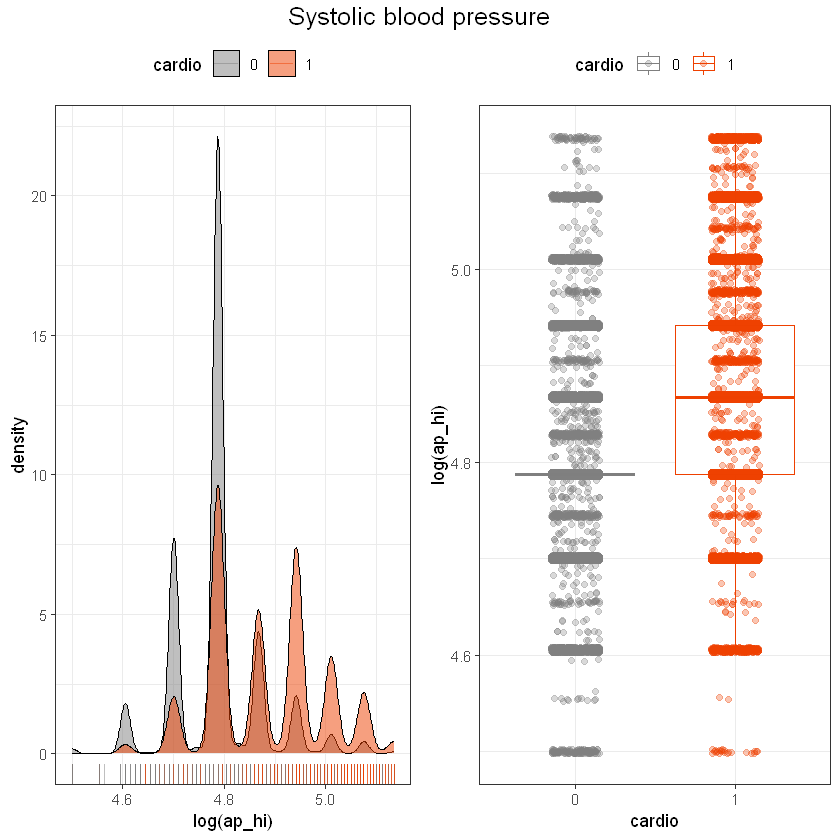

In [15]:
#Data visualization: Bivariate plots
#log(ap_hi) 
p1 <- ggplot(data = datos, aes(x = log(ap_hi), fill = cardio)) +
  geom_density(alpha = 0.5) + scale_fill_manual(values = c("gray50", "orangered2")) + 
  geom_rug(aes(color = cardio), alpha = 0.5) +
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw() 

p2 <- ggplot(data = datos, aes(x = cardio, y = log(ap_hi), color = cardio)) + 
  geom_boxplot(outlier.shape = NA) +
  geom_jitter(alpha = 0.3, width = 0.15) + 
  scale_color_manual(values = c("gray50", "orangered2")) +
  theme_bw() 

final_plot1 <- ggarrange(p1, p2, legend = "top") 
final_plot1 <- annotate_figure(final_plot1, top = text_grob("Systolic blood pressure", size = 15)) 
final_plot1

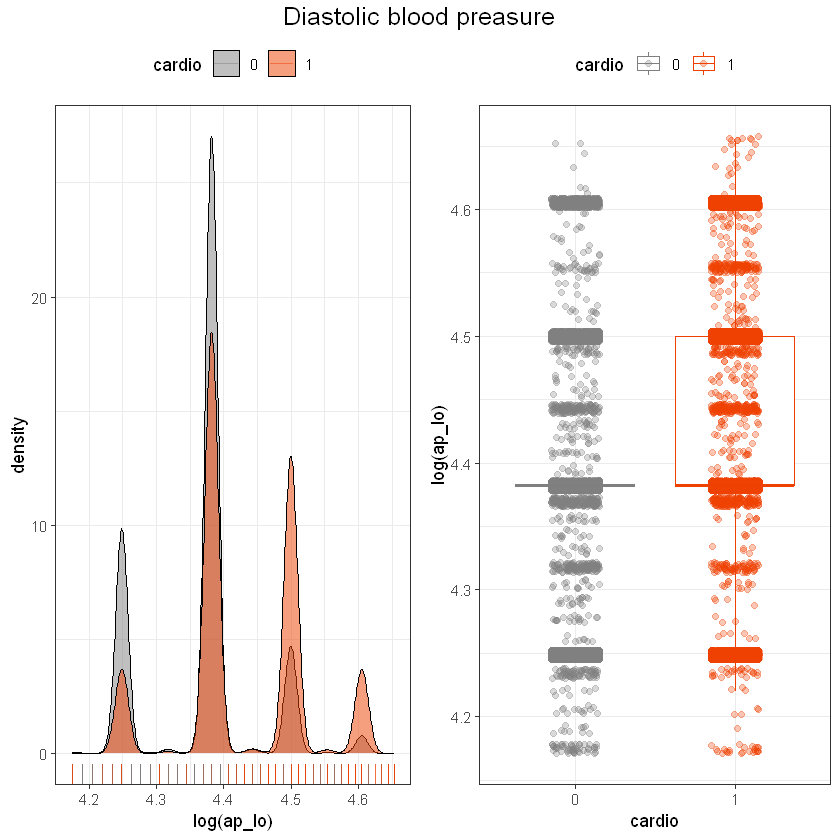

In [16]:
#ap_lo 
p3 <- ggplot(data = datos, aes(x = log(ap_lo), fill = cardio)) +
  geom_density(alpha = 0.5) + 
  scale_fill_manual(values = c("gray50", "orangered2")) + 
  geom_rug(aes(color = cardio), alpha = 0.5) + 
  scale_color_manual(values = c("gray50", "orangered2")) +
  theme_bw()

p4 <- ggplot(data = datos, aes(x = cardio, y = log(ap_lo), color = cardio)) +
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(alpha = 0.3, width = 0.15) +
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw() 

final_plot2 <- ggarrange(p3, p4, legend = "top") 
final_plot2 <- annotate_figure(final_plot2, top = text_grob("Diastolic blood preasure", size = 15))
final_plot2

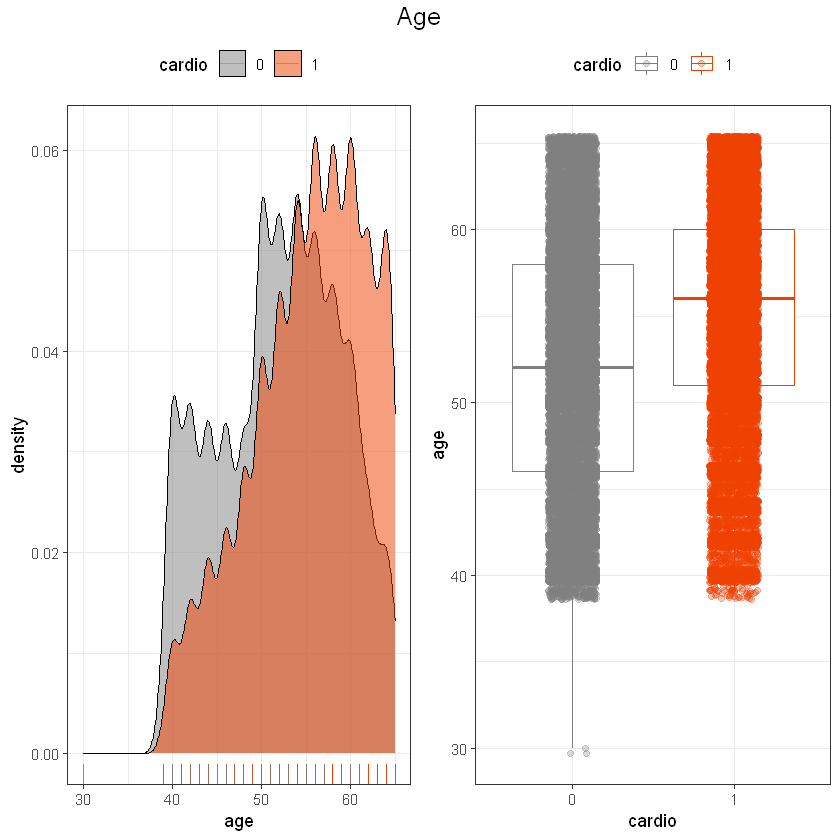

In [17]:
#age 
p5 <- ggplot(data = datos, aes(x = age, fill = cardio)) + 
  geom_density(alpha = 0.5) + scale_fill_manual(values = c("gray50", "orangered2")) +
  geom_rug(aes(color = cardio), alpha = 0.5) + 
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw()
p6 <- ggplot(data = datos, aes(x = cardio, y = age, color = cardio)) +
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(alpha = 0.3, width = 0.15) +
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw() 

final_plot3 <- ggarrange(p5, p6, legend = "top") 
final_plot3 <- annotate_figure(final_plot3, top = text_grob("Age", size = 15)) 
final_plot3

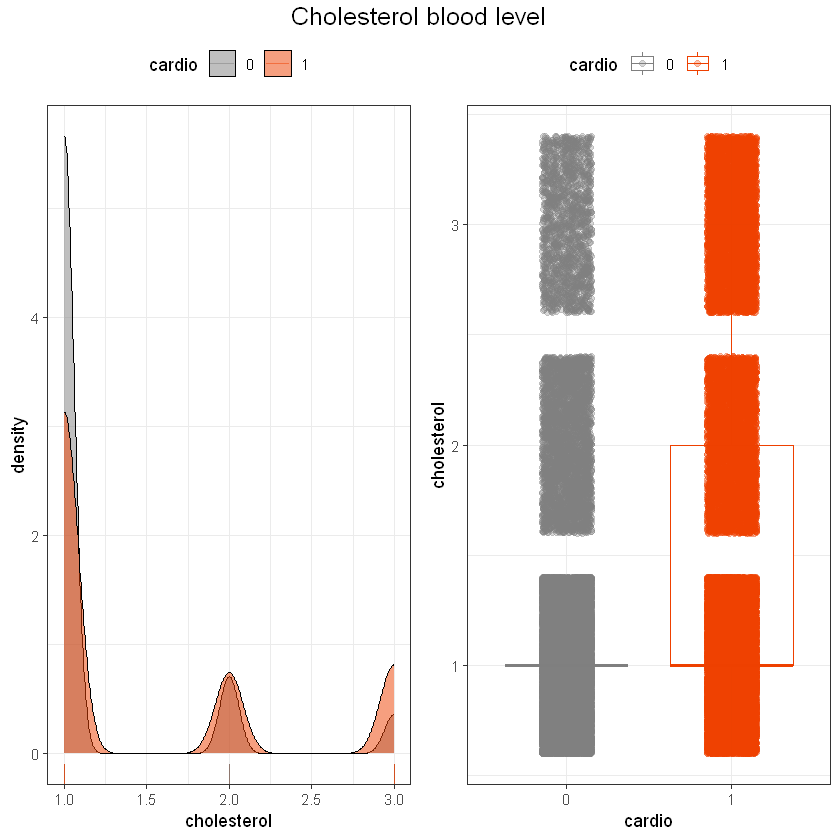

In [18]:
#cholesterol
p7 <- ggplot(data = datos, aes(x = cholesterol, fill = cardio)) + 
  geom_density(alpha = 0.5) + scale_fill_manual(values = c("gray50", "orangered2")) +
  geom_rug(aes(color = cardio), alpha = 0.5) + 
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw()
p8 <- ggplot(data = datos, aes(x = cardio, y = cholesterol, color = cardio)) +
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(alpha = 0.3, width = 0.15) +
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw() 

final_plot4 <- ggarrange(p7, p8, legend = "top") 
final_plot4 <- annotate_figure(final_plot4, top = text_grob("Cholesterol blood level", size = 15)) 
final_plot4

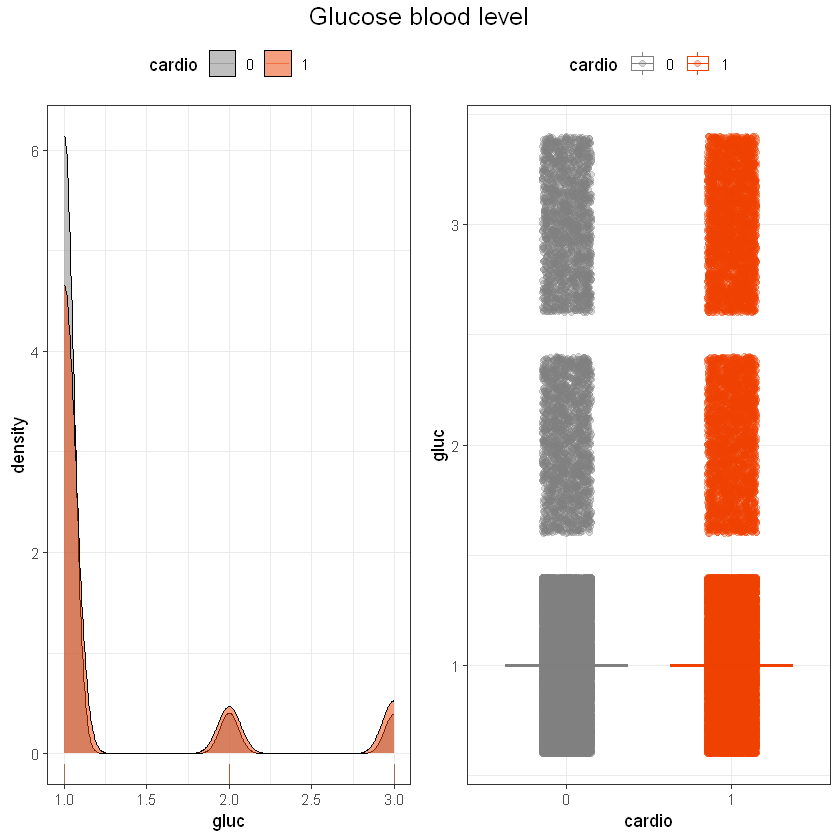

In [19]:
#glucose
p3 <- ggplot(data = datos, aes(x = gluc, fill = cardio)) + 
  geom_density(alpha = 0.5) + scale_fill_manual(values = c("gray50", "orangered2")) +
  geom_rug(aes(color = cardio), alpha = 0.5) + 
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw()
p4 <- ggplot(data = datos, aes(x = cardio, y = gluc, color = cardio)) + geom_boxplot(outlier.shape = NA) + 
  geom_jitter(alpha = 0.3, width = 0.15) +
  scale_color_manual(values = c("gray50", "orangered2")) + 
  theme_bw() 

final_plot5 <- ggarrange(p3, p4, legend = "top") 
final_plot5 <- annotate_figure(final_plot5, top = text_grob("Glucose blood level", size = 15)) 
final_plot5

Observations:

CVD condition appears mostly in patients with higher blood pressure levels (both diastolic and systolic).

Age seems to be an important factor in the occurrence of this cardiac condition, since most patients older than 55 years suffer from CVD.

In [20]:
#2.e. Categorical variables

#Variable conversion

#The type of data of the variables "smoke", "alco", "active" and "gender" does not correspond to the nature of the variable. Although these variables are coded as 1 and 0, it should not be stored in numeric format. To avoid this type of problem, the variables are categorized so that their two possible levels are "Yes"-"No", "male" - "female".

datos$smoke <- if_else(datos$smoke == 1, "Yes", "No") 
datos$smoke <- as.factor(datos$smoke)

datos$alco <- if_else(datos$alco == 1, "Yes", "No") 
datos$alco <- as.factor(datos$alco)

datos$active <- if_else(datos$active == 1, "Yes", "No") 
datos$active <- as.factor(datos$active)

datos$gender <- if_else(datos$gender == 2, "female", "male")
datos$gender <- as.factor(datos$gender)

        
             0     1
  female 11098 10689
  male   20537 20181

        
            0    1
  female 0.51 0.49
  male   0.50 0.50

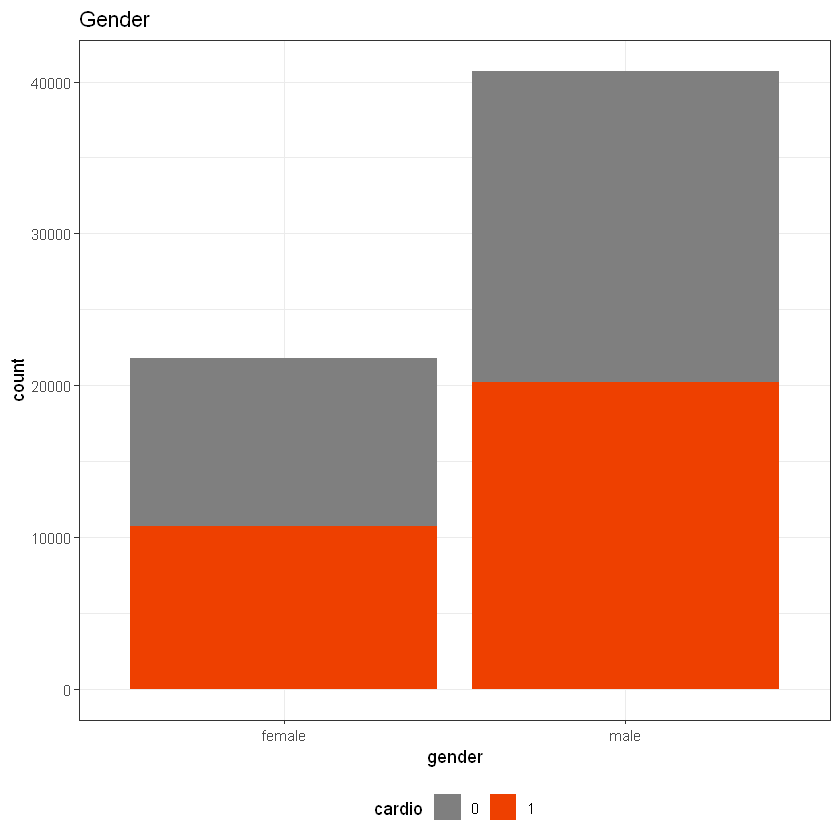

In [21]:
#Data visualization: Bivariate plots
#gender 
ggplot(data = datos, aes(x = gender, y = after_stat(count), fill = cardio)) + 
  geom_bar() + 
  scale_fill_manual(values = c("gray50", "orangered2")) +
  labs(title = "Gender") + 
  theme_bw() +
  theme(legend.position = "bottom") 
# Relative frequency table 
table(datos$gender, datos$cardio)
prop.table(table(datos$gender, datos$cardio), margin = 1) %>% round(digits = 2)

     
          0     1
  No  28709 28399
  Yes  2926  2471

     
         0    1
  No  0.50 0.50
  Yes 0.54 0.46

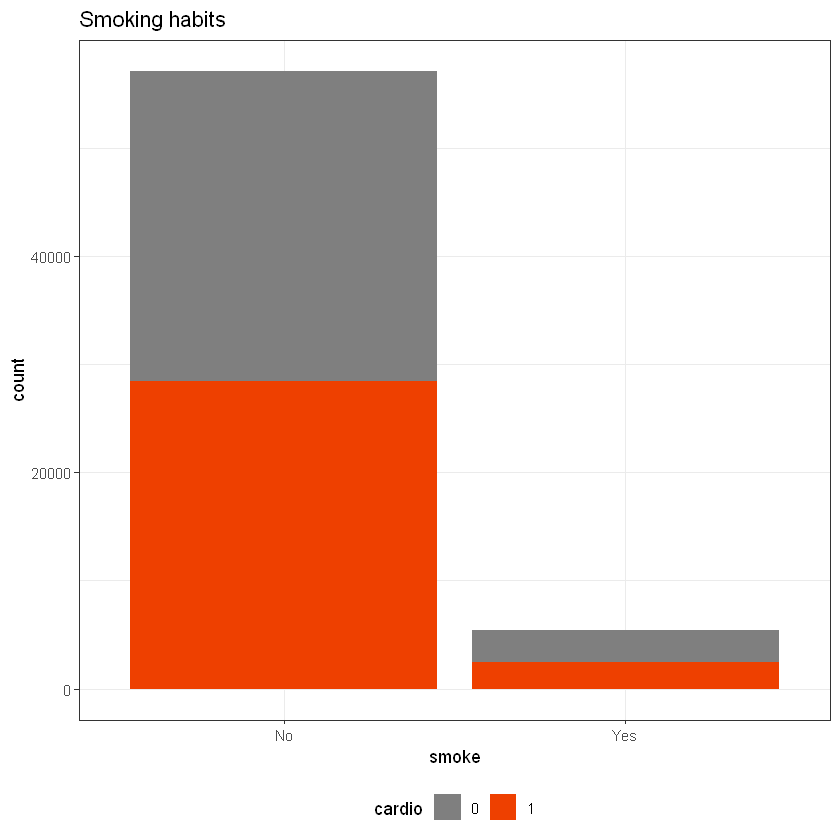

In [22]:
#smoke
ggplot(data = datos, aes(x = smoke, y = after_stat(count), fill = cardio)) + 
  geom_bar() + 
  scale_fill_manual(values = c("gray50", "orangered2")) + 
  labs(title = "Smoking habits") + 
  theme_bw() +
  theme(legend.position = "bottom")
# Relative frequency table 
table(datos$smoke, datos$cardio)
prop.table(table(datos$smoke, datos$cardio), margin = 1) %>% round(digits = 2)

     
          0     1
  No   5723  6508
  Yes 25912 24362

     
         0    1
  No  0.47 0.53
  Yes 0.52 0.48

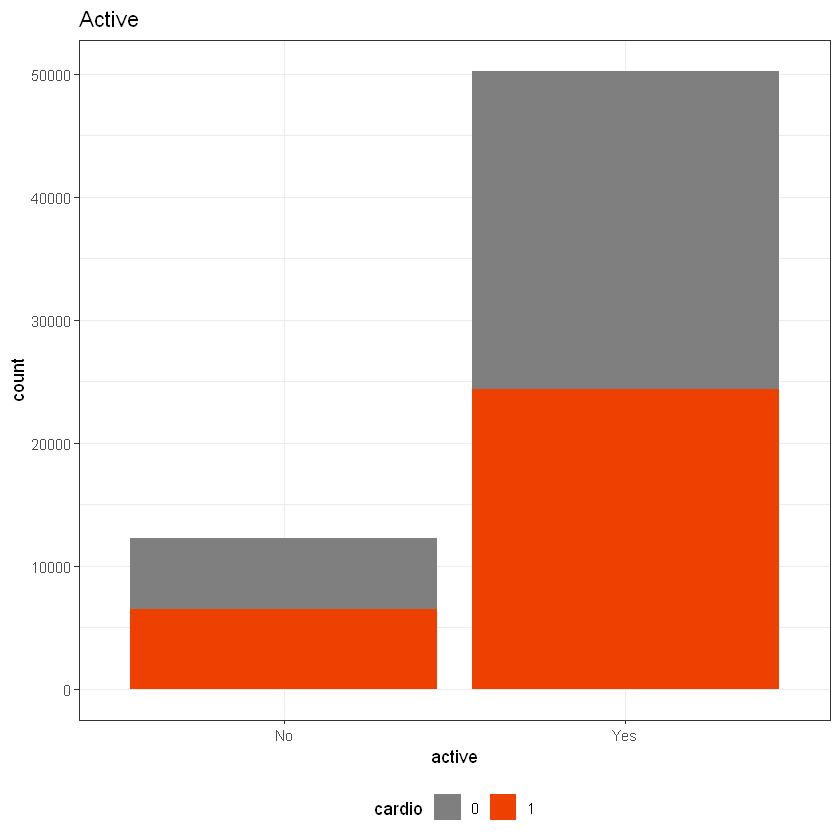

In [23]:
#active
ggplot(data = datos, aes(x = active, y = after_stat(count), fill = cardio)) + geom_bar() + 
  scale_fill_manual(values = c("gray50", "orangered2")) + 
  labs(title = "Active") + 
  theme_bw() +
  theme(legend.position = "bottom")
# Relative frequency table 
table(datos$active, datos$cardio)
prop.table(table(datos$active, datos$cardio), margin = 1) %>% round(digits = 2)

     
          0     1
  No  29899 29345
  Yes  1736  1525

     
         0    1
  No  0.50 0.50
  Yes 0.53 0.47

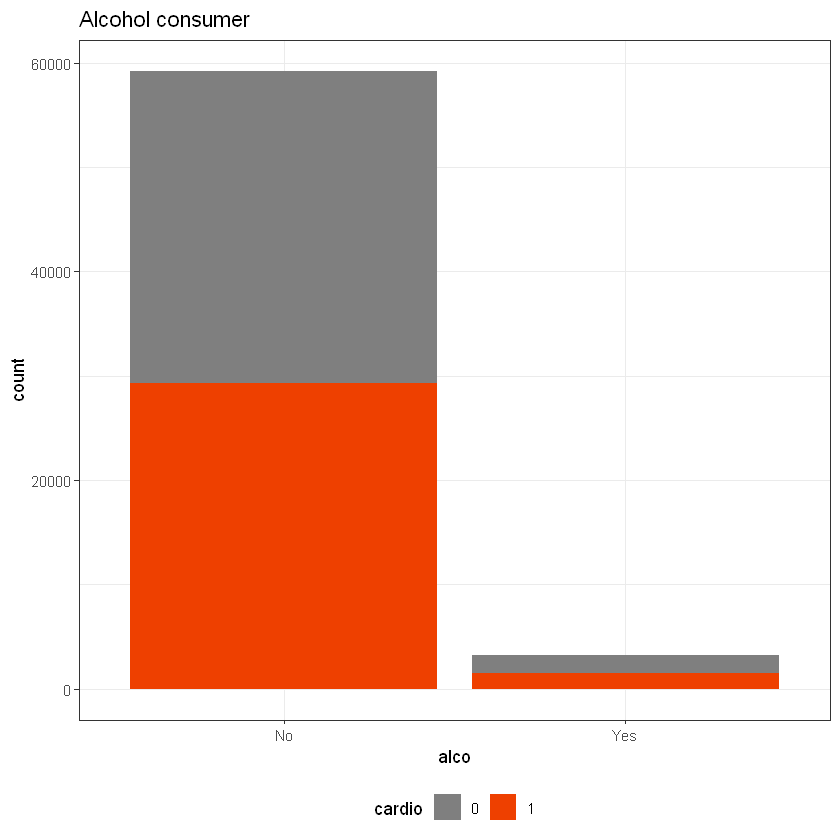

In [24]:
#alcoholism
ggplot(data = datos, aes(x = alco, y = after_stat(count), fill = cardio)) + geom_bar() + 
  scale_fill_manual(values = c("gray50", "orangered2")) + 
  labs(title = "Alcohol consumer") + 
  theme_bw() +
  theme(legend.position = "bottom") 
# Relative frequency table 
table(datos$alco, datos$cardio)
prop.table(table(datos$alco, datos$cardio), margin = 1) %>% round(digits = 2)

In [ ]:
Observations:

For the variables "alco", "smoke" and "active" classes are unbalanced.

In [25]:
#2.f. Variable importance and selection

#Correlation analysis
#Highy correlated variables 
corMatrix<- cor(datos[,3:8]) 
print(corMatrix) 
highlyCorrelated<- findCorrelation(corMatrix, cutoff=0.70, names=TRUE) 

print(paste("variables with correlation coefficient > 0.70 =", highlyCorrelated))



                  height     weight       ap_hi       ap_lo cholesterol
height       1.000000000 0.30578309 -0.01079634 0.006625566 -0.06819015
weight       0.305783091 1.00000000  0.23316107 0.214569182  0.12540939
ap_hi       -0.010796338 0.23316107  1.00000000 0.705636801  0.19254656
ap_lo        0.006625566 0.21456918  0.70563680 1.000000000  0.15580548
cholesterol -0.068190151 0.12540939  0.19254656 0.155805480  1.00000000
gluc        -0.028392519 0.08678662  0.08281908 0.063136767  0.45007852
                   gluc
height      -0.02839252
weight       0.08678662
ap_hi        0.08281908
ap_lo        0.06313677
cholesterol  0.45007852
gluc         1.00000000
[1] "variables with correlation coefficient > 0.70 = ap_hi"


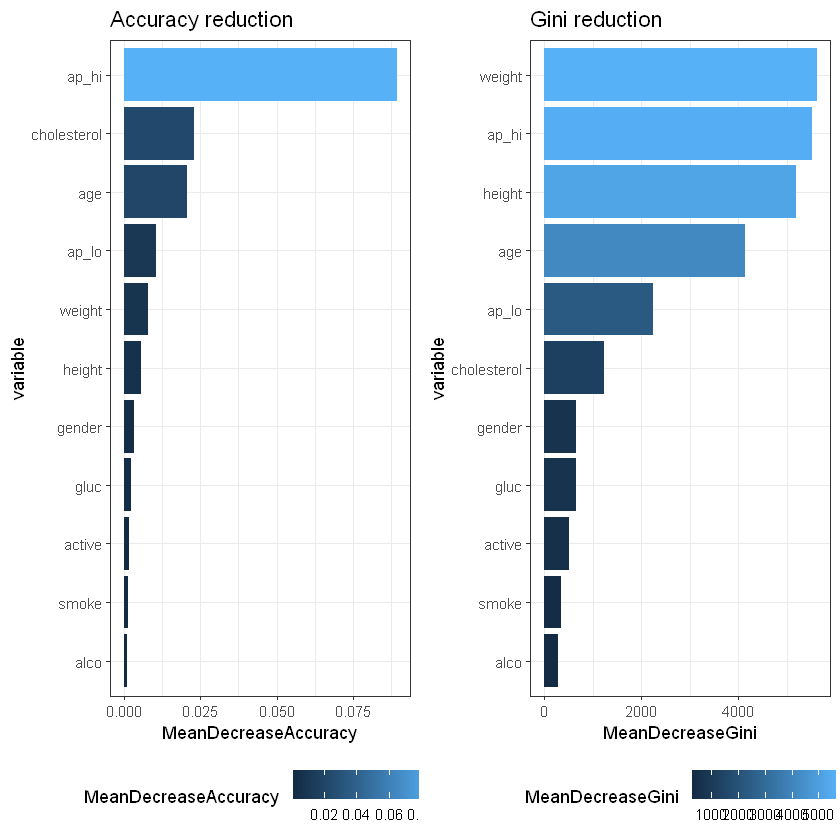

In [26]:
#Variable Importance with Random Forest

#The random forest algorithm can be used for variable selection. This algorithm does not require standardization, it handles quantitative and categorical predictors and it is not influenced by outliers. However, it is sensitive to unbalanced data and NAs.
modelo_randforest <- randomForest(formula = cardio ~ . ,
                                  data = datos,
                                  mtry = 5,
                                  importance = TRUE,
                                  ntree = 500)

importancia <- as.data.frame(modelo_randforest$importance) 

importancia <- rownames_to_column(importancia,var = "variable")

#plot importance
p1.1 <- ggplot(data = importancia, aes(x = reorder(variable, MeanDecreaseAccuracy),y = MeanDecreaseAccuracy, fill = MeanDecreaseAccuracy)) +
  labs(x = "variable", title = "Accuracy reduction") +
  geom_col() +
  coord_flip() + 
  theme_bw() + 
  theme(legend.position = "bottom")

p2.2 <- ggplot(data = importancia, aes(x = reorder(variable, MeanDecreaseGini), y = MeanDecreaseGini, fill = MeanDecreaseGini)) + labs(x = "variable", title = "Gini reduction") +
  geom_col() + 
  coord_flip() +
  theme_bw() + 
  theme(legend.position = "bottom") 

ggarrange(p1.1, p2.2)

Exploratory data analysis conclusions

The exploration of the data seem to indicate that the factors that most influence the occurrence of cardiovascular disease (CVD) are: systolic and diastolic blood pressure, age, cholesterol blood level , weight and height of the patient.

A high correlation was also detected between the variables "ap_lo" and "ap_hi".

Considering the selection of variables carried out using the random forest algorithm for the construction of the predictive model, the following predictors will be used: "age", "gender", "ap_hi", "height", "weight", "glucose" and "cholesterol".

3. Splitting data

In [27]:
#Create training and testing datasets, preserving the 50/50 class split in each.
set.seed(16) 
#Create a list of 80% of the instances for training 
validationIndex <-createDataPartition(datos$cardio, p=0.80, list=FALSE) #Use the remaining 20% to validate 
validation <- datos[-validationIndex,] 
training<- datos[validationIndex,]

#check the balance of the "cardio" classes in both sets
prop.table(table(validation$cardio)) 
prop.table(table(training$cardio))


        0         1 
0.5061195 0.4938805 


        0         1 
0.5061195 0.4938805 

4. Data preprocess

In order to prepare the data for modeling we use the library(recipes) for standardization of numerical variables and binarization of factors. Binarization consists of creating new dummy variables with each of the levels of the qualitative variables. This process is also known as one hot encoding.

In [28]:
#Create an object that contains the response variable and the predictors of interest 
objeto_recipe <- recipe(formula = cardio ~ age + height + weight + 
                          ap_hi + cholesterol +gluc + gender, 
                        data = training) 
objeto_recipe

#Define the preprocessing steps 
objeto_recipe <- objeto_recipe %>% step_center (all_numeric())
objeto_recipe <- objeto_recipe %>% step_scale (all_numeric())
objeto_recipe <- objeto_recipe %>% step_dummy (all_nominal(),-all_outcomes())

#Trained the object with the training dataset
trained_recipe <- prep(objeto_recipe, training=training)

#Applied the preprocess to both training and validation dataset
p_training <- bake(trained_recipe, new_data = training)
p_validation <-bake(trained_recipe, new_data = validation)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



5.Classification Methods

In [29]:
#Resampling method
 trainControl<- trainControl(method="cv", number=5) 
 metric<- "Accuracy"

In [30]:
#5.a. Logistic regression - GLM
set.seed(7)
fit.glm<- train(cardio~., 
                data=p_training,
                method="glm", 
                metric=metric, 
                trControl=trainControl) 
summary(fit.glm)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9657  -0.9172  -0.3864   0.9383   2.5596  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.02222    0.01922  -1.156  0.24781    
age          0.34434    0.01069  32.219  < 2e-16 ***
height      -0.03763    0.01256  -2.997  0.00273 ** 
weight       0.15539    0.01126  13.797  < 2e-16 ***
ap_hi        0.97558    0.01294  75.420  < 2e-16 ***
cholesterol  0.32285    0.01236  26.111  < 2e-16 ***
gluc        -0.06188    0.01180  -5.246 1.56e-07 ***
gender_male  0.06916    0.02492   2.775  0.00552 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69313  on 50003  degrees of freedom
Residual deviance: 56335  on 49996  degrees of freedom
AIC: 56351

Number of Fisher Scoring iterations: 4


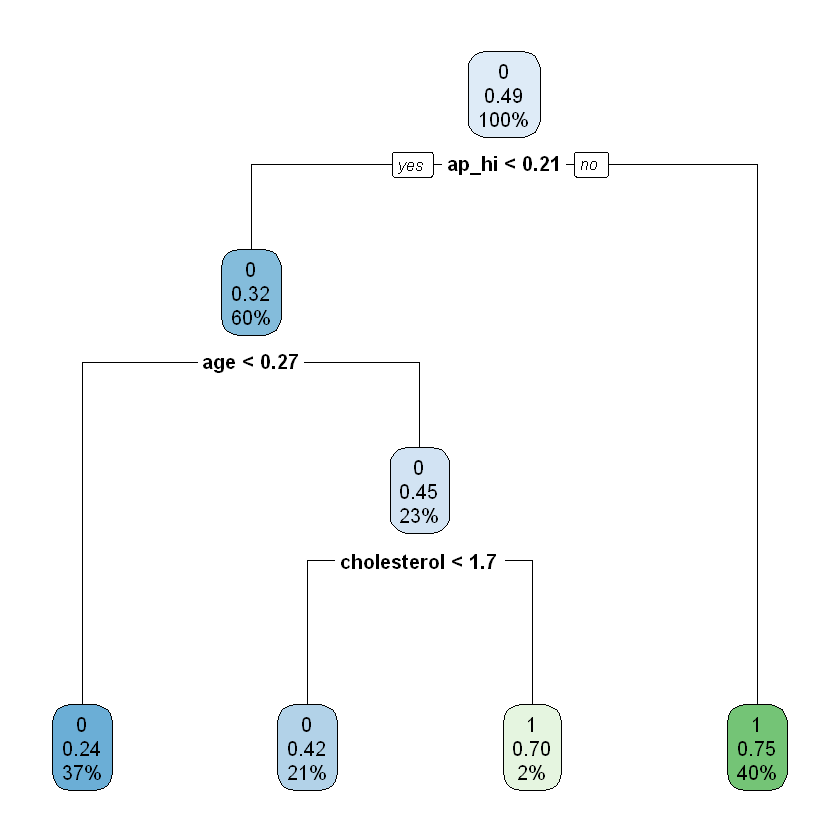

In [31]:
#b Decision Tree - CART
set.seed(7) 
 fit.cart <- train(cardio~., 
                   data= p_training, 
                   method="rpart", 
                   metric=metric,
                   trControl=trainControl) 
#Plot decision tree
decision_tree_plot<- rpart.plot(fit.cart$finalModel)

In [32]:
#Random Forest -RF
set.seed(7) 
fit.rf <- train(cardio~., 
                data= p_training, 
                method="rf", 
                metric=metric, 
                trControl=trainControl)

In [33]:
#K-nearest neighbor - KNN
set.seed(7) 
fit.knn <- train(cardio~.,
                 data= p_training,
                 method="knn", 
                 metric=metric, 
                 trControl=trainControl)

6. Model evaluation


Call:
summary.resamples(object = results)

Models: GLM, CART, knn, RF 
Number of resamples: 5 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
GLM  0.7156000 0.7182282 0.7220278 0.7205622 0.7221000 0.7248550    0
CART 0.7130287 0.7140000 0.7182000 0.7190222 0.7249275 0.7249550    0
knn  0.7024000 0.7049295 0.7073293 0.7071433 0.7089000 0.7121576    0
RF   0.7205279 0.7211000 0.7245000 0.7257017 0.7292271 0.7331534    0

Kappa 
          Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
GLM  0.4302589 0.4355185 0.4431167 0.4401524 0.4431865 0.4486814    0
CART 0.4257785 0.4270059 0.4353626 0.4373071 0.4487861 0.4496025    0
knn  0.4044411 0.4095243 0.4143150 0.4139067 0.4174077 0.4238458    0
RF   0.4403615 0.4414122 0.4483216 0.4506450 0.4576678 0.4654619    0


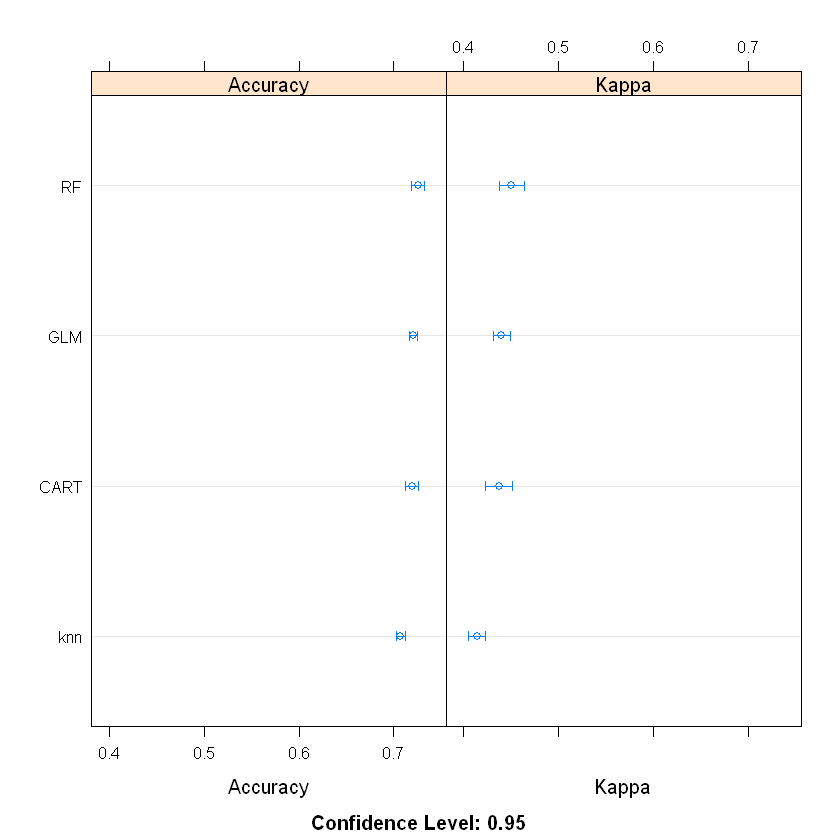

In [34]:
results<- resamples(list(GLM=fit.glm, 
                         CART=fit.cart,
                         knn=fit.knn, 
                         RF=fit.rf)) 
summary(results) 

#Dotplot of the results
dotplot(results)

Model evaluation conclusions

All the algorithms managed to correctly classify more than 50% of the observations, thus exceeding the basal level.

Random forest algorithm showed the best performance with a mean accuracy of % 72.57 along with the logistic regression (mean accuracy of % 72.05).

Let's see if we can optimize the random forest algorithm.

7. Randon forest optimization of hyperparameters

,mtry,ntree,Accuracy,Kappa,AccuracySD,KappaSD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,100,0.7238019,0.4468210,0.004312555,0.008555833
2,2,200,0.7243418,0.4479145,0.005622526,0.011193471
3,2,300,0.7248818,0.4490158,0.005360928,0.010657100
4,2,400,0.7253017,0.4498453,0.005580105,0.011094121
5,2,500,0.7258016,0.4508574,0.006322224,0.012601684


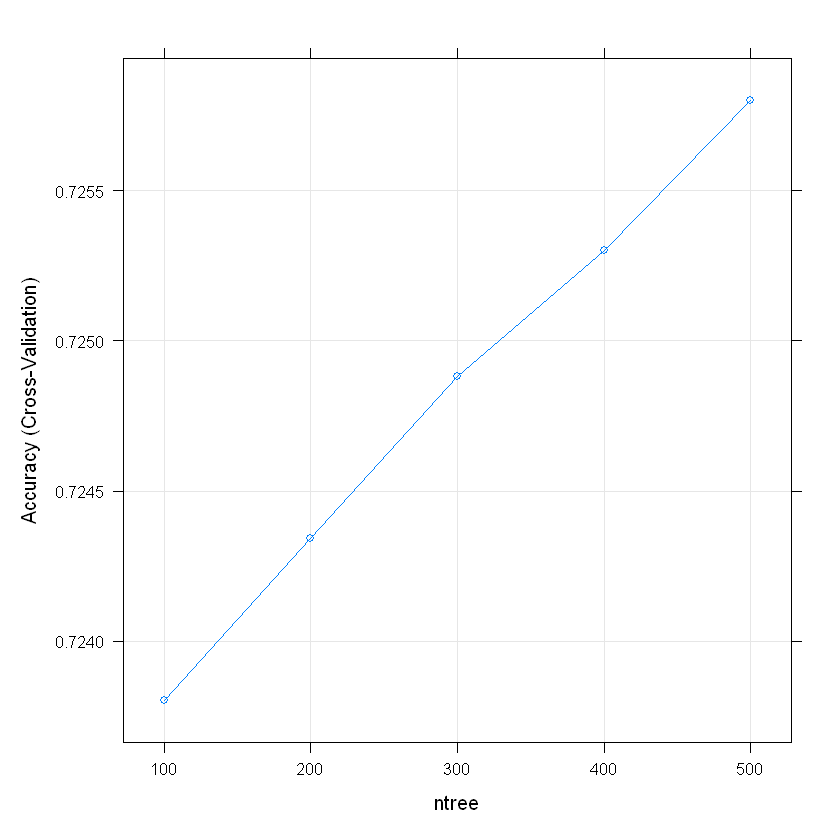

In [35]:
#Random forest algorithm has two hyperparameters ntree and mtry that can be optimized. The optimal value of mtry usually found is the square root of N, where N is the total number of samples. In the model fit.rf with an optimal value of mtry = 2 the model reached an accuracy of % 72.57. So we will tune the ntree parameter and see if we can optimize the model.

#Optimization of hyperparameters (mtry and ntree) with extend caret
#Custom random forest algorithm
customRF <- list(type = "Classification", library = "randomForest", 
                 loop = NULL)
customRF$parameters <- data.frame(parameter = c("mtry", "ntree"), 
                                  class = rep("numeric", 2), 
                                  label = c("mtry", "ntree"))
customRF$grid <- function(x, y, len = NULL, search = "grid") {}
customRF$fit <- function(x, y, wts, param, lev, last, weights, classProbs, ...) {
  randomForest(x, y, mtry = param$mtry, ntree=param$ntree, ...)
}
customRF$predict <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata)
customRF$prob <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
   predict(modelFit, newdata, type = "prob")
customRF$sort <- function(x) x[order(x[,1]),]
customRF$levels <- function(x) x$classes 

#train model with different values of hyperparameter (ntree)
control <- trainControl(method="cv", number=5)
tunegrid <- expand.grid(.mtry=2, .ntree=seq(100,500, by=100))
set.seed(7)
custom <- train(cardio~., data=p_training, method=customRF, metric=metric, tuneGrid=tunegrid, trControl=control)

#compare results
custom$results
plot(custom)

Observations:

The most accurate value for ntree is 500.

The final model with ntree= 500 and mtry= 2 reached a mean accuracy of 72.58% (a lift over our first model fit.rf using the default mtry value).

8. Final model predictions

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 4960 2061
         1 1367 4113
                                          
               Accuracy : 0.7258          
                 95% CI : (0.7179, 0.7336)
    No Information Rate : 0.5061          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4507          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7839          
            Specificity : 0.6662          
         Pos Pred Value : 0.7065          
         Neg Pred Value : 0.7505          
             Prevalence : 0.5061          
         Detection Rate : 0.3968          
   Detection Prevalence : 0.5616          
      Balanced Accuracy : 0.7251          
                                          
       'Positive' Class : 0               
                        

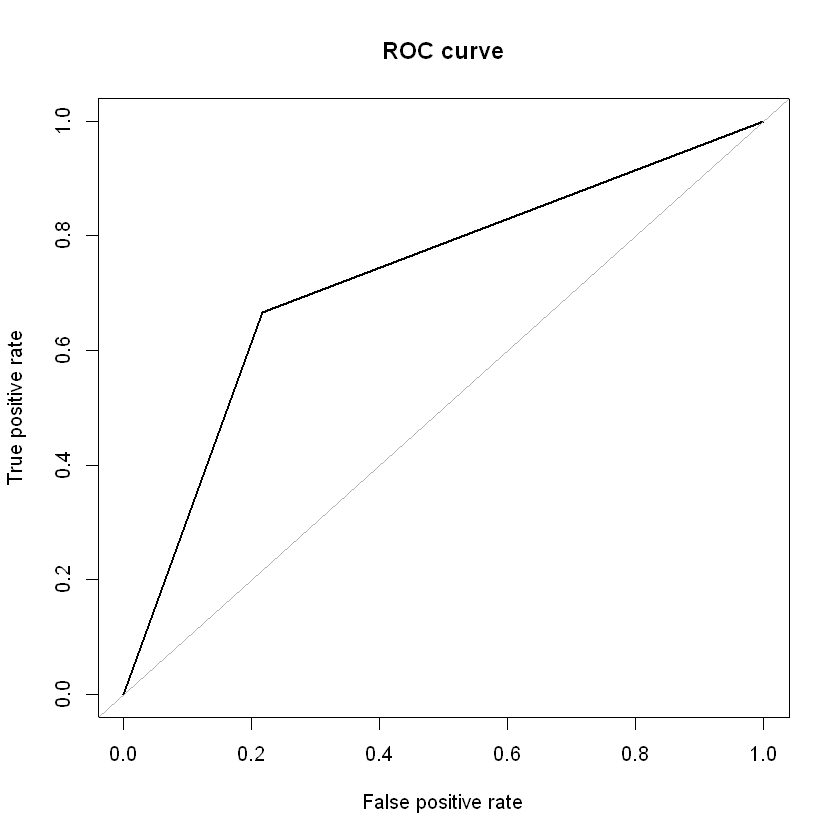

In [36]:
#Predictions
predict_finalmodel<- predict(custom, newdata = p_validation)

#Confusion Matriz
confusionMatrix(predict_finalmodel, p_validation$cardio)

#ROC curve plot
p_validation$cardio <- ifelse(p_validation$cardio=="0",0,1)
roc_rf <-roc.curve(p_validation$cardio,predict_finalmodel)

9. Final conclusions

Based on the statistics describing the performance of the models, we can conclude that the best classification model for cardiovascular disease dataset is random forest with a tuning hyperparameter of mtry=2 and ntree = 500.

The final model predict correctly % 72.58 of observations and does not show overfitting.

The most importat risk factor associated with CVD are systolic blood pressure (ap_hi), age and cholesterol blood level.

According to the logistic regression coefficients for every one unit increase in systolic blood pressure, a person's risk of developing CVD triples. In addition, for each increase in age and cholesterol blood level (increase by 20 mg/dL), the risk increases by 40%.

Some other considerations:

A possible alternative to model the information provided by the variables ap_hi and ap_lo without removing one of them from the modeling (due to high correlation) is to create a new variable e.g. blood pressure, considering the 5 levels proposed by the American Heart Association.

Since "cholesterol" and "glucose" only take on 3 numeric values, on other alternative is to categorize them.

Other classification algorithms than can be evaluated for this analysis are: Super Vector Machine as well as ensemble algorithms (using bagging or boosting methods).

10. References

KUHN, Max, et al. Applied predictive modeling. New York: Springer, 2013.

JAMES, Gareth, et al. An introduction to statistical learning. New York: springer, 2013.

Machine Learning con R y caret by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at this link

Predicting patient's survival from heart failure and identify most important risk factors by Andrea Furmanek and Divij Pherwani, available at this link